In [1]:
import torch
from torchvision import datasets,transforms
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
import matplotlib.pyplot as plt
import numpy as np

/Users/arch/opt/anaconda3/envs/hml_project/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset_tranforms = transforms.Compose([
        transforms.Pad(2),
        transforms.ToTensor(),
    ]
)

In [3]:
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=dataset_tranforms)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=dataset_tranforms)

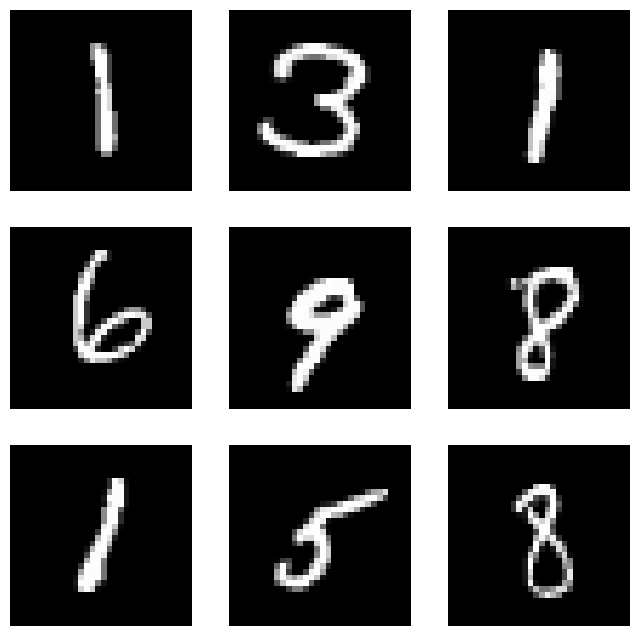

In [4]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(mnist_trainset), size=(1,)).item()
    img, label = mnist_trainset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [5]:
from data_loading import permute_train_test_data

In [6]:
training_permutations , test_permutations = permute_train_test_data(mnist_trainset,mnist_testset)

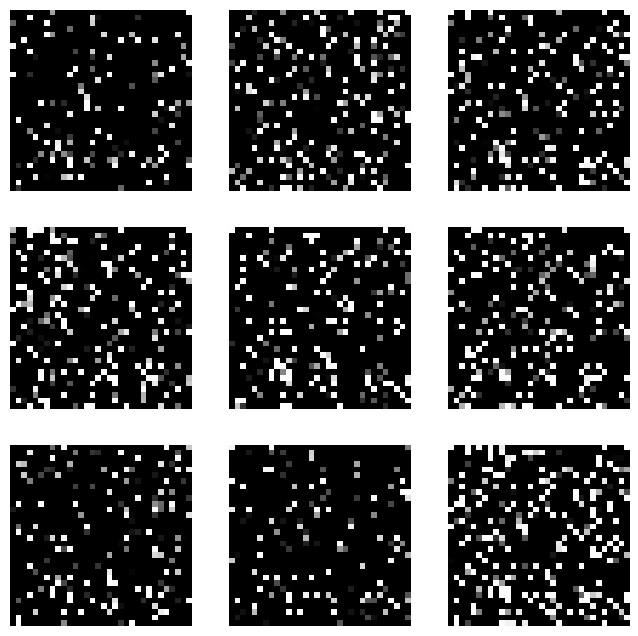

In [7]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_permutations[0]), size=(1,)).item()
    img, label = training_permutations[0][sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [8]:
from EWC_model import *
from train import * 

In [9]:
# -conv-layers
'''
        depth=depth,
        conv_type=args.conv_type if depth>0 else None,
        start_channels=args.channels if depth>0 else None,
        reducing_layers=args.rl if depth>0 else None,
        num_blocks=args.n_blocks if depth>0 else None,
        conv_bn=(True if args.conv_bn=="yes" else False) if depth>0 else None,
        conv_nl=args.conv_nl if depth>0 else None,
        no_fnl=True if depth>0 else None,
        global_pooling=checkattr(args, 'gp') if depth>0 else None,
'''
model = Classifier(
        image_size=32*32,
        image_channels=1,
        classes=10,
        # -fc-layers
        fc_units=400,
        fc_drop=0.2,
        fc_bn=True

    )

In [10]:
model.fisher_n = None
model.fisher_labels = 'all'
model.fisher_batch = 1
# -options relating to 'Offline EWC' (Kirkpatrick et al., 2017) and 'Online EWC' (Schwarz et al., 2018)
model.offline = True
model.weight_penalty = True
model.reg_strength = .5

In [11]:
train_cl(model, training_permutations, iters=2, batch_size=32)

context:   0%|          | 0/10 [00:00<?, ?it/s]

1


Iterations: 100%|██████████| 2/2 [00:20<00:00, 10.18s/it]


context training done


context:   0%|          | 0/10 [03:24<?, ?it/s]


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/arch/opt/anaconda3/envs/hml_project/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3433, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/6_/w6mgwpfd12z46rvjfl18xd400000gn/T/ipykernel_7549/2689611066.py", line 1, in <module>
    train_cl(model, training_permutations, iters=2, batch_size=32)
  File "/Users/arch/Desktop/Academics/Fall 22/HML/Course Project/power-law-for-CI/train.py", line 81, in train_cl
    model.estimate_fisher(train_dataset, allowed_classes=allowed_classes)
  File "/Users/arch/Desktop/Academics/Fall 22/HML/Course Project/power-law-for-CI/EWC_model.py", line -1, in estimate_fisher
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/arch/opt/anaconda3/envs/hml_project/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2052, in showtraceback
    stb = self.Inte